<a href="https://colab.research.google.com/github/billy90834/-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# Ignore  the warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import random as rn
from sklearn.model_selection import train_test_split

#imports 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import models
from scipy.ndimage import zoom

from keras.models import load_model

In [ ]:
#train of dataset
ds_train = image_dataset_from_directory(
    '/content/drive/MyDrive/flowers',
    labels='inferred',
    label_mode = "categorical",
    image_size=[128, 128],
    validation_split = 0.3,
    subset="training",
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
    seed=42
)

Found 4317 files belonging to 5 classes.
Using 3022 files for training.


In [ ]:
#valid of dataset 
ds_valid = image_dataset_from_directory(
    '/content/drive/MyDrive/flowers',
    labels='inferred',
    label_mode = "categorical",
    image_size=[128, 128],
    validation_split = 0.3,
    subset="validation",
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
    seed=42
)


Found 4317 files belonging to 5 classes.
Using 1295 files for validation.


In [ ]:
#analysing the class names
class_names = ds_train.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
for image,label in ds_train.take(1):
    print("shape:",image.shape)

In [ ]:
#使用 AUTOTUNE 找到 prefetching 的最佳參數
AUTOTUNE = tf.data.AUTOTUNE 

ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
ds_valid = ds_valid.cache().prefetch(buffer_size=AUTOTUNE)
#define the ramdomic of the layers
tf.random.set_seed(42) 
np.random.seed(42)

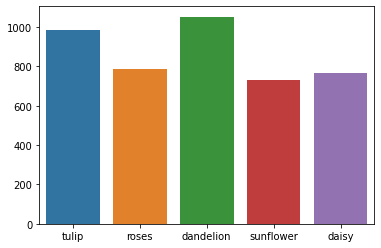

In [ ]:
#data可視化
sns.barplot(x=['tulip','roses','dandelion','sunflower','daisy'] , y=[len(os.listdir('/content/drive/MyDrive/flowers/tulip')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/rose')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/dandelion')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/sunflower')),
                                    len(os.listdir('/content/drive/MyDrive/flowers/daisy'))])

In [ ]:
##影像資料增補
data_augmentation = keras.Sequential([
    preprocessing.RandomZoom(0.1),
    preprocessing.RandomFlip(mode="horizontal"),
    preprocessing.RandomRotation(factor=0.1),
    
])

In [ ]:
#create model
model = keras.Sequential([
    
    
    layers.InputLayer(input_shape=[128, 128, 3]),
    
    #Data preprocessing
    data_augmentation,
    
    layers.Rescaling(1./255),

    
    #Base
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'), 
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Dropout(0.25),
    
    # Head
    layers.BatchNormalization(),
    layers.GlobalMaxPooling2D(),
    layers.Dense(len(class_names),activation="softmax") #output
])

In [ ]:
# 輸出模型摘要資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 64)       

In [ ]:
#reduce the learnng rate
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001)
#definindo optimizador
optimizer = tf.keras.optimizers.Adam(epsilon=0.01,learning_rate=0.01)

In [ ]:
# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=['accuracy'],
)

# 進行訓練, 訓練過程會存在 history 變數中
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    callbacks=[reduce_lr],
)

48/48 [==============================] - 688s 6s/step - loss: 1.6062 - accuracy: 0.4186 - val_loss: 1.4619 - val_accuracy: 0.3761 - lr: 0.0100
Epoch 2/30
48/48 [==============================] - 7s 146ms/step - loss: 1.1350 - accuracy: 0.5288 - val_loss: 1.3707 - val_accuracy: 0.4687 - lr: 0.0100
Epoch 3/30
48/48 [==============================] - 7s 146ms/step - loss: 1.0279 - accuracy: 0.5877 - val_loss: 1.3133 - val_accuracy: 0.4865 - lr: 0.0100
Epoch 4/30
48/48 [==============================] - 7s 145ms/step - loss: 0.9730 - accuracy: 0.6165 - val_loss: 1.1342 - val_accuracy: 0.5969 - lr: 0.0100
Epoch 5/30
48/48 [==============================] - 7s 145ms/step - loss: 0.9240 - accuracy: 0.6420 - val_loss: 1.0441 - val_accuracy: 0.6324 - lr: 0.0100
Epoch 6/30
48/48 [==============================] - 7s 145ms/step - loss: 0.8969 - accuracy: 0.6602 - val_loss: 1.0039 - val_accuracy: 0.6301 - lr: 0.0100
Epoch 7/30
48/48 [==============================] - 7s 146ms/step - loss: 0.8971 -

In [ ]:
#classification  report 成果 
test_images1 = [image.numpy() for image,labels in ds_valid.take(-1)][0]
test_labels1 = [labels.numpy() for image,labels in ds_valid.take(-1)][0]
test_labels1 = np.argmax(test_labels1,axis=-1)
predict_labels1 = np.argmax(model.predict(test_images1),axis=-1)

print(classification_report(test_labels1,predict_labels1,target_names=class_names))

              precision    recall  f1-score   support

       daisy       0.92      0.79      0.85        14
   dandelion       1.00      1.00      1.00         5
        rose       1.00      0.55      0.71        20
   sunflower       0.67      1.00      0.80        10
       tulip       0.52      0.73      0.61        15

    accuracy                           0.75        64
   macro avg       0.82      0.81      0.79        64
weighted avg       0.82      0.75      0.75        64



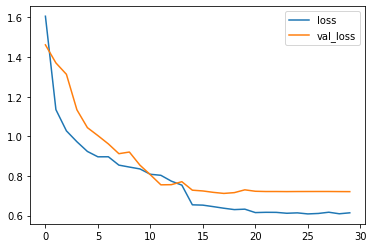

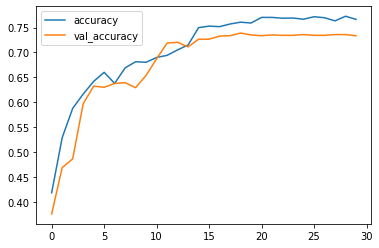

In [ ]:
# Plot learning curves
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();